In [4]:
from empirical import *
import matplotlib.pyplot as plt

In [15]:
parent_name = "handout/en_data/"
train_input = parent_name + "train.txt"
val_input = parent_name + "validation.txt"
index_to_word = parent_name + "index_to_word.txt"
index_to_tag = parent_name + "index_to_tag.txt"

seq_lens = [10, 100, 1000, 10000]

hmm = HMM(index_to_word, index_to_tag)
log_train = []
log_val = []
for seq_len in seq_lens:
    hmm.update(seq_len, train_input)
    print("sequence length", seq_len)
    preds, logprobs = hmm.predict(name=val_input)
    meanlogprob = np.mean(logprobs)
    log_val.append(meanlogprob)
    print(meanlogprob)
    preds, logprobs = hmm.predict(name=train_input)
    meanlogprob = np.mean(logprobs)
    log_train.append(meanlogprob)
    print(meanlogprob)

sequence length 10
-87.97153090660584
-80.54472148949858
sequence length 100
-80.83229271827639
-74.9944493589361
sequence length 1000
-70.45566558750309
-67.59317395746352
sequence length 10000
-61.08562092334498
-60.6122844422585


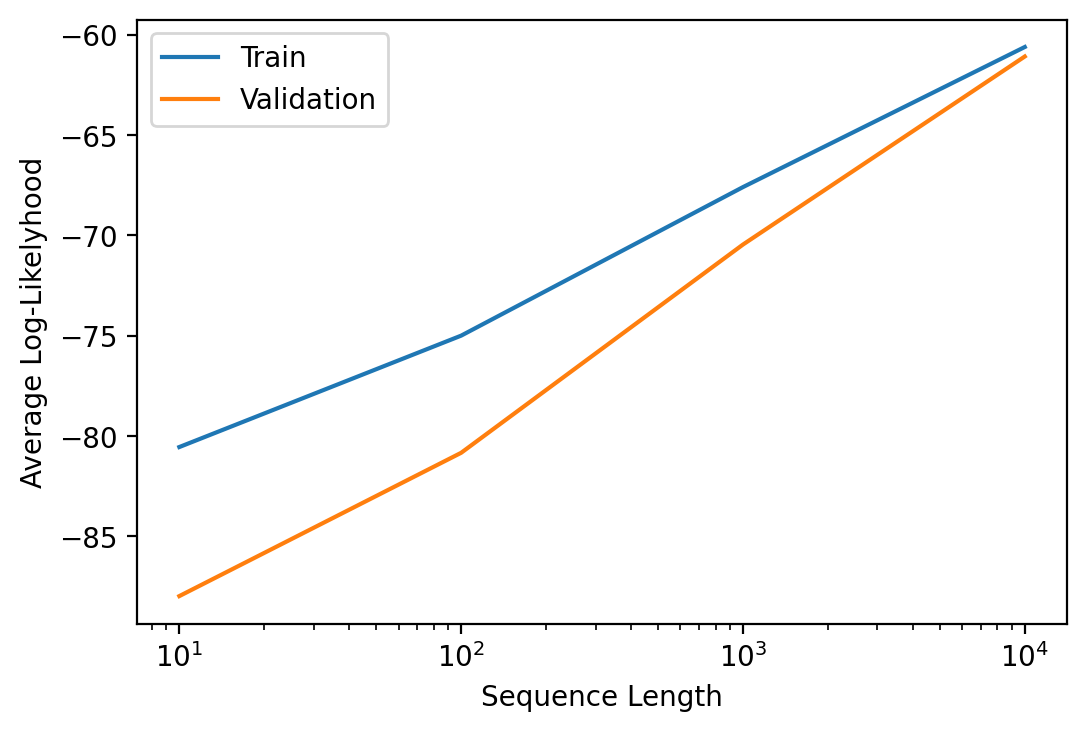

In [18]:
plt.figure(dpi=200)
plt.plot(seq_lens, log_train)
plt.plot(seq_lens, log_val)
plt.xlabel("Sequence Length")
plt.ylabel("Average Log-Likelyhood")
plt.legend(["Train", "Validation"])
plt.xscale('log')
plt.show()